In [124]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib as jb
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
data = pd.read_csv("./Data/salary.csv")
data.head(20)



,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175
5,PhD,19,Rural,Director,27,Female,156312.936208
6,PhD,4,Rural,Director,60,Female,130567.649455
7,PhD,13,Suburban,Director,49,Female,148707.740759
8,Bachelor,20,Urban,Engineer,25,Female,95945.275429
9,PhD,14,Urban,Analyst,58,Female,133339.389682


# SPLITTING


In [125]:
features =['Age','Experience','Education','Job_Title','Location']

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = data[features]
y=data["Salary"]
X.head(20)

,Age,Experience,Education,Job_Title,Location
0,63,8,High School,Manager,Urban
1,59,11,PhD,Director,Suburban
2,61,28,Bachelor,Manager,Suburban
3,45,29,High School,Director,Rural
4,26,25,PhD,Analyst,Urban
5,27,19,PhD,Director,Rural
6,60,4,PhD,Director,Rural
7,49,13,PhD,Director,Suburban
8,25,20,Bachelor,Engineer,Urban
9,58,14,PhD,Analyst,Urban


# CHUAN HOA

Chuẩn hóa các dữ liệu phân loại về dạng số thực để máy tính có thể hiểu và xử lí


In [127]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
categorical_features = ['Education', 'Location', 'Job_Title']
numeric_features = ['Experience', 'Age']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])
X = preprocessor.fit_transform(X)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_df = pd.DataFrame(X)
X_df.head(20)



,0,1,2,3,4
0,0.0,0.0,1.0,1.0,1.0


# Sự phân bổ dữ liệu

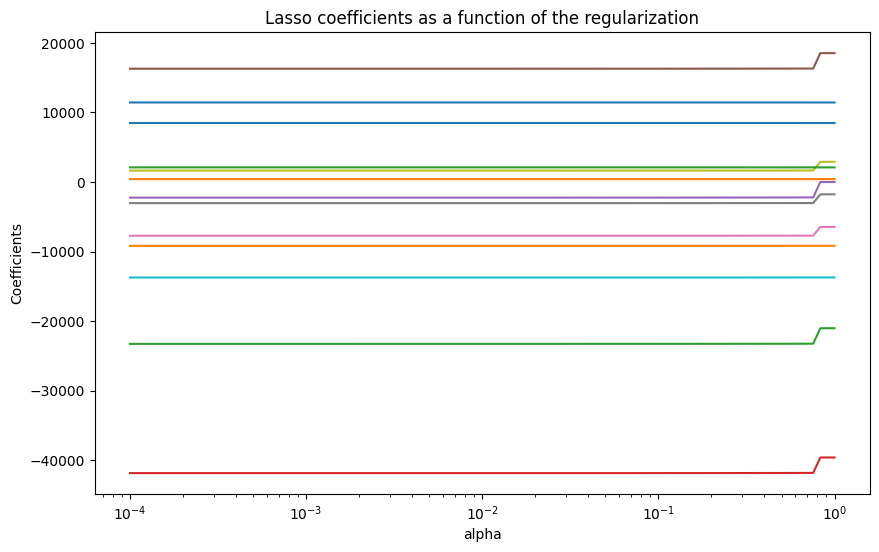

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

# Giả sử bạn đã chuẩn bị X_train, y_train

alphas = np.logspace(-4, 0, 100)
coefs = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# Vẽ đồ thị các hệ số thay đổi theo alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


# LINEAR REGRESSION

In [129]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
jb.dump(lr_model, 'linear.pkl')

['linear.pkl']

# Tìm alpha tối ưu


In [130]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
# Thiết lập các giá trị alpha cần thử nghiệm
alphas = {'alpha': [0.001, 0.01, 0.1, 1, 10]}

# Tạo đối tượng Lasso và GridSearchCV
lasso = Lasso()
grid = GridSearchCV(lasso, alphas, cv=5)

# Tìm alpha tối ưu
grid.fit(X_train, y_train)
print(grid.best_params_)  # In ra alpha tốt nhất


{'alpha': 0.1}


# Lasso


In [131]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=10)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
jb.dump(lasso_model, 'lasso.pkl')

['lasso.pkl']

# Neural Network

In [132]:
nn_model = MLPRegressor(hidden_layer_sizes=(200, 200, 200), activation='relu', solver='adam',max_iter=2000)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
jb.dump(nn_model, 'nn.pkl')

['nn.pkl']

# Stacking


In [133]:
from sklearn.ensemble import StackingRegressor
# Khởi tạo các mô hình thành phần
base_models = [
    ('lr', LinearRegression()),
    ('lasso', Lasso(alpha=10)),
    ('nn', MLPRegressor(hidden_layer_sizes=(200, 200, 200),activation='relu', solver='adam', max_iter=1000))
]

# Mô hình tổng hợp
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Huấn luyện mô hình Stacking
stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)
jb.dump(stacking_model, 'stacking.pkl')

['stacking.pkl']

# Danh gia

In [134]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error, mean_absolute_error

def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return mse, r2, rmse, mae
def calculate_nse(y_true, y_pred):
    # Tính giá trị trung bình của y_true
    mean_observed = np.mean(y_true)

    # Tính tổng sai số bình phương giữa giá trị thực tế và giá trị dự đoán
    numerator = np.sum((y_true - y_pred) ** 2)
    
    # Tính tổng sai số bình phương giữa giá trị thực tế và giá trị trung bình
    denominator = np.sum((y_true - mean_observed) ** 2)

    # Tính chỉ số NSE
    nse = 1 - (numerator / denominator)
    return nse
# Đánh giá các mô hình
for model_name, y_pred in [("Linear Regression", y_pred_lr),
                           ("Lasso", y_pred_lasso),
                           ("Neural Network", y_pred_nn),
                           ("Stacking", y_pred_stacking)]:
    mse, r2, rmse, mae = evaluate_model(y_test, y_pred)
    nse = calculate_nse(y_test,y_pred)
    print(f"{model_name} - MSE: {mse:.4f}, R²: {r2:.4f}, RMSE:{rmse:.4f}, MAE:{mae:.4f}, NSE:{nse:.4f}")


Linear Regression - MSE: 100385496.0893, R²: 0.8861, RMSE:10019.2563, MAE:8014.4476, NSE:0.8861
Lasso - MSE: 100353957.2175, R²: 0.8861, RMSE:10017.6822, MAE:8016.9564, NSE:0.8861
Neural Network - MSE: 100858336.5562, R²: 0.8855, RMSE:10042.8251, MAE:8046.3731, NSE:0.8855
Stacking - MSE: 99783885.5347, R²: 0.8868, RMSE:9989.1884, MAE:7971.1029, NSE:0.8868
